# Mobile app usage



Dataset: **Mobile app usage**  `lsapp.tsv`

Source: https://github.com/aliannejadi/LSApp/tree/main

Original article: Mohammad Aliannejadi, Hamed Zamani, Fabio Crestani, and W. Bruce Croft. 2021. Context-aware Target Apps Selection and Recommendation for Enhancing Personal Mobile Assistants. ACM Trans. Inf. Syst. 39, 3, Article 29 (July 2021), 30 pages. https://doi.org/10.1145/3447678


This starter notebook includes the *original preprocessing* steps in `LSApp`, and a few visualizations to get you started.  You can download the processed file used in this notebook here: [app usage](https://ucdavis.box.com/s/6of233heq70qcp77mt19zcm80y8t0e8x).

## 0 First look

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#  Adjust the path below if your lsapp.tsv lives elsewhere
df = pd.read_csv('../data/lsapp.tsv', sep='\t')

In [3]:
df.head()

,user_id,session_id,timestamp,app_name,event_type
0,0,1,2018-01-16 06:01:05,Minesweeper Classic (Mines),Opened
1,0,1,2018-01-16 06:01:05,Minesweeper Classic (Mines),Closed
2,0,1,2018-01-16 06:01:07,Minesweeper Classic (Mines),Opened
3,0,1,2018-01-16 06:01:07,Minesweeper Classic (Mines),Closed
4,0,1,2018-01-16 06:01:08,Minesweeper Classic (Mines),Opened


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658589 entries, 0 to 3658588
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     int64 
 1   session_id  int64 
 2   timestamp   object
 3   app_name    object
 4   event_type  object
dtypes: int64(2), object(3)
memory usage: 139.6+ MB


In [5]:
df.describe()

,user_id,session_id
count,3.658589e+06,3.658589e+06
mean,1.466050e+02,3.501439e+04
std,8.504212e+01,2.215092e+04
min,0.000000e+00,1.000000e+00
25%,7.100000e+01,1.540500e+04
50%,1.380000e+02,3.128200e+04
75%,2.210000e+02,5.499700e+04
max,2.910000e+02,7.624700e+04


In [6]:
df['app_name'].unique()

array(['Minesweeper Classic (Mines)', 'Gmail', 'Google', 'Instagram',
       'Google Chrome', 'Clock', 'Maps', 'YouTube', 'Facebook',
       'Messages', 'Phone', 'Snapchat', 'Settings', 'Google Photos',
       'Hangouts', 'Amazon Shopping', 'Facebook Messenger',
       'Google Play Store', 'Calendar', 'Discord', 'Google Drive',
       'Twitter', 'Spotify Music', 'Reddit', 'Android In Call UI',
       'Receipt Hog', 'Ibotta', 'PayPal Mobile Cash', 'Contacts',
       'Samsung Notes', 'Messaging', 'Samsung Gallery', 'eBay',
       'Flipboard Briefing', 'Camera', 'Yahoo Mail', 'S’more',
       'Lucktastic', 'Pinterest', 'Words With Friends 2',
       'Google Play Music', 'Calculator', 'Samsung Internet Browser',
       'Hulu', 'Walmart', 'MUIQ Survey App', 'WhatsApp Messenger',
       'Robinhood', 'Calorie Counter', 'Pandora Music',
       'Microsoft Outlook', 'Samsung Email', 'Netflix', 'Messenger Lite',
       'Reward Stash', 'OfferUp', 'Brave Browser', 'Slidejoy',
       'Verizon Messag

<Axes: xlabel='app_name'>

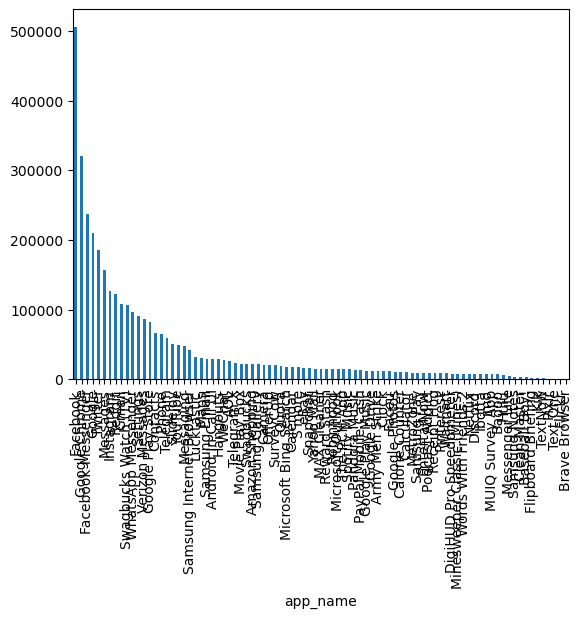

In [7]:
df['app_name'].value_counts().plot(kind='bar')

In [8]:
df['event_type'].unique()

array(['Opened', 'Closed', 'User Interaction', 'Broken'], dtype=object)

<Axes: xlabel='event_type'>

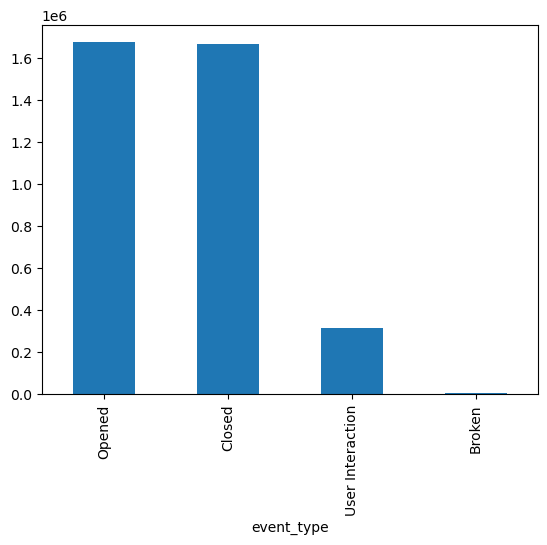

In [9]:
df['event_type'].value_counts().plot(kind='bar')

## 1 Data preprocessing

In [10]:
# Convert timestamp to datetime
print(type(df['timestamp'][0]))
df['timestamp'] = pd.to_datetime(df['timestamp'])
print(type(df['timestamp'][0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [11]:
# Creating an interaction_id column
df['interaction_id'] = (
    ((df['timestamp'] - df['timestamp'].shift(1) > pd.Timedelta(1, 'm')) & (df['event_type'] == 'Opened'))
    | (df['app_name'] != df['app_name'].shift(1))
    | (df['user_id'] != df['user_id'].shift(1))
).cumsum()

In [12]:
df_start = df.drop_duplicates(subset=['interaction_id'], keep='first').copy()
df_end   = df.drop_duplicates(subset=['interaction_id'], keep='last').copy()
df_start.set_index('interaction_id', inplace=True)
df_end.set_index('interaction_id', inplace=True)

# dataset based on interaction
df_interaction = df_start.copy()
df_interaction['open_time']  = df_start['timestamp']
df_interaction['close_time'] = df_end['timestamp']

In [13]:
df_interaction

,user_id,session_id,timestamp,app_name,event_type,open_time,close_time
interaction_id,,,,,,,
1,0,1,2018-01-16 06:01:05,Minesweeper Classic (Mines),Opened,2018-01-16 06:01:05,2018-01-16 06:01:09
2,0,1,2018-01-16 06:03:44,Minesweeper Classic (Mines),Opened,2018-01-16 06:03:44,2018-01-16 06:04:17
3,0,2,2018-01-16 06:25:54,Gmail,User Interaction,2018-01-16 06:25:54,2018-01-16 06:25:54
4,0,2,2018-01-16 06:26:05,Google,Opened,2018-01-16 06:26:05,2018-01-16 06:26:10
5,0,2,2018-01-16 06:26:10,Instagram,Opened,2018-01-16 06:26:10,2018-01-16 06:26:21
...,...,...,...,...,...,...,...
599631,291,76245,2018-04-06 12:47:28,Facebook Messenger,Opened,2018-04-06 12:47:28,2018-04-06 12:53:13
599632,291,76246,2018-04-06 13:20:12,Settings,Opened,2018-04-06 13:20:12,2018-04-06 13:20:14
599633,291,76247,2018-04-06 14:34:15,Settings,Opened,2018-04-06 14:34:15,2018-04-06 14:34:17


>**Tip** Take a small subset to explore if necessary.

## 2 Exploratory data analysis

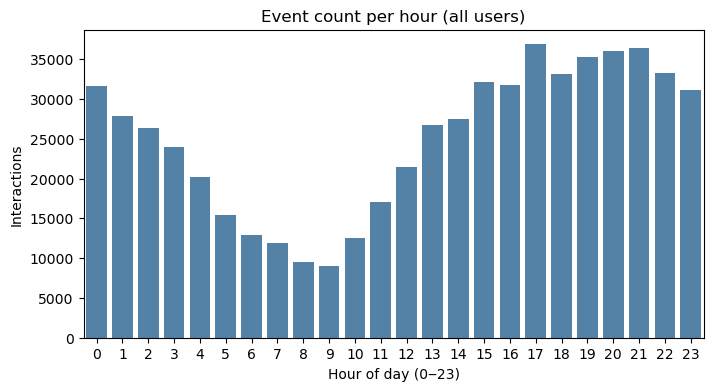

In [14]:
# ───────────────────────────────────────────────────────────────
# Idea 1. Daily rhythm – interaction volume by hour of day
# ───────────────────────────────────────────────────────────────
df_interaction['hour'] = df_interaction['timestamp'].dt.hour

fig, ax = plt.subplots(figsize=(8,4))

sns.countplot(x='hour', data=df_interaction, color='steelblue', ax = ax)

ax.set_title('Event count per hour (all users)')
ax.set_xlabel('Hour of day (0‒23)')
ax.set_ylabel('Interactions')

plt.show()

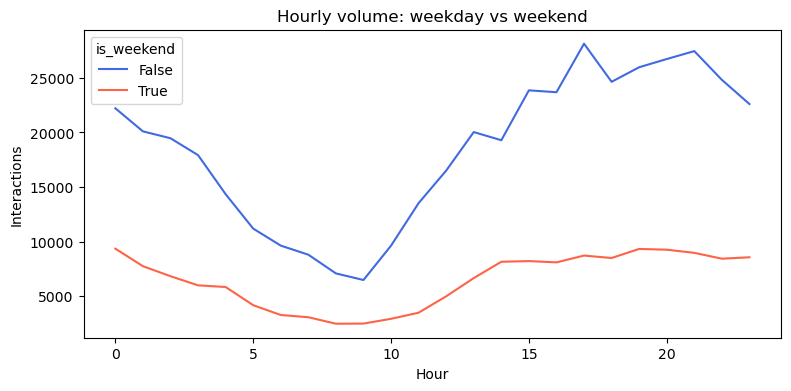

In [15]:
# ───────────────────────────────────────────────────────────────
# Idea 2. Weekend vs weekday hourly pattern
# ───────────────────────────────────────────────────────────────

df_interaction['is_weekend'] = df_interaction['timestamp'].dt.dayofweek >= 5      # 0=Mon … 6=Sun

pivot = (df_interaction
         .groupby([df_interaction['timestamp'].dt.hour, 'is_weekend'])
         .size()
         .reset_index(name='n'))

fig, ax = plt.subplots(figsize=(9,4))

sns.lineplot(data=pivot,
             x='timestamp', y='n', hue='is_weekend',
             palette=['royalblue','tomato'],
             ax = ax)

ax.set_title('Hourly volume: weekday vs weekend')
ax.set_xlabel('Hour')
ax.set_ylabel('Interactions')

plt.show()

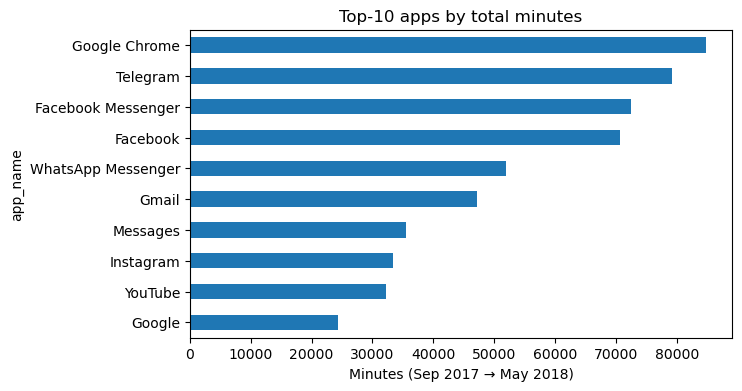

In [16]:
# ───────────────────────────────────────────────────────────────
# Idea 3. Top-10 apps by cumulative screen-time
# ───────────────────────────────────────────────────────────────
df_interaction['minutes'] = (df_interaction['close_time']-df_interaction['open_time']).dt.total_seconds()/60
top10_screen = (df_interaction.groupby('app_name')['minutes']
                              .sum()
                              .sort_values(ascending=False)
                              .head(10))

fig, ax = plt.subplots(figsize=(7,4))

top10_screen.plot(ax = ax, kind='barh') 
# This is a more direct way to add visualization from DataFrame.
# It is equivalent to:
# ax.barh(top10_screen.index, top10_screen.values)

ax.set_title('Top-10 apps by total minutes')
ax.set_xlabel('Minutes (Sep 2017 → May 2018)')
ax.invert_yaxis()

plt.show()

## 3 Next step?